# Summary

**Action Points**

**1) Prioritize retention and risk mitigation in the "Online TA" segment**<br>
- Accounts for >50% of all successful bookings
- Has been more volatile in 2020 YTD versus equivalent dates 2019:
    - 32% rise in cancellations, therefore responsible for 106% of increase in cancellations
- Stabilising this segment is critical to maintaining overall booking volume and revenue consistency

**2) Reassess strategy for the "Offline TA/TO" segment**<br>
- Improvement in cancellations (-20%) in 2020 YTD versus equivalent dates 2019
- However, number of actual revenue-generating bookings dropped 36% - this is the biggest contributor to the 2020 YTD revenue shortfall, as this segment makes up about 23% of successful bookings (completed, or cancelled and non-refundable)
- Revival is a high priority
- Ideas examples:
    - Increased engagement with travel agents
    - Review of channel-specific pricing and package offerings

**3) Investigate root causes of longer lead times in general**<br>
- Whilst lead times for completed bookings have increased, so too have lead times for cancelled bookings, in 2020 YTD versus equivalent dates 2019.
- I.e. indicator of potential fragility: disturbs confidence in long-term revenue forecasting and management
- Possibility: previously introduced feature unintentially made reservations more tentative

**Fly-by:**

1) Revenue for 2018 (partial) far surpassed by equivalent-period 2019
- Main driver is number of bookings, not increased value of bookings
    - Especially in market segment **"Online TA"**, but also worth highlighting **"Offline TA/TO"** and **"Direct"**

2) YTD revenue 2020 almost matches that of equivalent-period 2019
- Sustainable: consistent month-by-month revenue growth in 2020
- Same three important market segments as mentioned above contributed proportionally to overall number of bookings as much in both 2019 and 2020
- However, number of revenue-generating bookings by secondary key segment "Offline TA/TO" decreased 36% in 2020 YTD vs 2019 YTD - _action point 2_

3) Encouraging: though number of bookings overall decreased, quality went up ("quality booking" := generated revenue)

4) Encouraging: longer average lead times in 2020 vs 2019, both overall and specifically in reference to those 3 major segments
- However,  lead time of cancelled bookings increased too, again for all 3 major segments - _action point 3_

5) (4) is especially noteworthy given the completion rate of bookings fell and actual number of cancellations rose in general, and most apparently in the key segment "Online TA" - _action point 1_

# Preamble

Dataset outline: 2018 - 2020 bookings for Hotel portfolio<br>
https://absentdata.com/data-analysis/where-to-find-data/<br>

Additional info on definitions:<br>
https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md
- Concat this data in future revisions

High-level findings and recommendations:


Summary of concerns and assumptions:
1) Assume SC meals (self-catered) have not had their price written in error, despite somehow costing more than full-board
2) Assume 'adr' (avg daily rate) is to be multiplied by nights stayed to find overall room rental revenue per booking, exclusive of meal costs
- See source: "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights"
3) Assume meals are applied to every non-baby guest in the same booking, for every day (nights + 1) spent
4) Assume Null children --> 0 children
5) Assume no money made from cancelled bookings. Or rather, do admit possibility of reclaiming deposits, but assess revenues of strictly completed bookings first
6) Assume bookings of zero pax are unsuable data
7) Assume bookings with zero adr (avg daily rate) yet which are not cancelled are unusable data

# Prelim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Remove scientific notation in larger figures
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_excel(r"D:\Code\Data Analysis\01 Hotel\hotel_revenue_historical_full-2.xlsx", sheet_name = None)

In [42]:
# Dimension table 1
# Typically would assume SC := self-catered --> cheaper
# Seems not the case this time. Raise concern of error, but go along with it (do not drop SC or any such action)

df_meal_cost = df['meal_cost']
df_meal_cost

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [4]:
# Dimension table 2
# Note discounted price would be price * (1 - discount)

df_market_segment = df['market_segment']
df_market_segment

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [16]:
# df_main := fact table of actual bookings by customers
# Concat sheets, having verified in source that columns match
df_main = pd.concat([df['2018'], df['2019'], df['2020']])
pd.set_option("display.max.columns", 50)
df_main[df_main["is_canceled"] == 0].head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7951,Resort Hotel,0,342,2018,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7952,Resort Hotel,0,737,2018,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2018-07-01
7953,Resort Hotel,0,7,2018,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7954,Resort Hotel,0,13,2018,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2018-07-02
7955,Resort Hotel,0,14,2018,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2018-07-03
7956,Resort Hotel,0,14,2018,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2018-07-03
7957,Resort Hotel,0,0,2018,July,27,1,0,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2018-07-03
7958,Resort Hotel,0,9,2018,July,27,1,0,2,2,0.00,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.00,NaN,0,Transient,103.00,0,1,Check-Out,2018-07-03
7959,Resort Hotel,0,35,2018,July,27,1,0,4,2,0.00,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.00,NaN,0,Transient,145.00,0,0,Check-Out,2018-07-05
7960,Resort Hotel,0,68,2018,July,27,1,0,4,2,0.00,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.00,NaN,0,Transient,97.00,0,3,Check-Out,2018-07-05


In [17]:
# Verify all rows from each year loaded in
df_main.groupby(df_main["arrival_date_year"]).size()

arrival_date_year
2018    21996
2019    79264
2020    40687
dtype: int64

In [18]:
# Any dupes?
# 41191 (!! Improve booking system, website UI, staff training, etc. to stop such an excess of errors)
# df_main[df_main.duplicated()]
len(df_main[df_main.duplicated()])

41191

In [19]:
df_main.drop_duplicates(inplace=True)
len(df_main[df_main.duplicated()])

0

In [20]:
df_main.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              8
babies                                0
meal                                  0
country                             561
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             14539
company                           94595


In [21]:
# Assumption: null children = 0. Need non-null to convert to int (from float)
df_main["children"] = df_main["children"].fillna(value = 0)

In [22]:
# Convert date_month from English to number
df_main["arrival_date_month"] = pd.to_datetime(df_main["arrival_date_month"], format = "%B").dt.month
df_main["children"] = df_main["children"].astype(np.int64)
df_main.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [23]:
df_main["pax"] = df_main.adults + df_main.children + df_main.babies

In [24]:
# absent deeper knowledge on booking system, assume 0 pax bookings are in error / not usable
df_main = df_main[df_main["pax"] != 0]
df_main.groupby("pax").size()

pax
1     18970
2     66028
3     11060
4      4314
5       156
6         2
10        4
12        3
20        4
26       10
27        4
40        2
50        2
55        2
dtype: int64

In [32]:
# 1,895 entries are not cancelled yet have adr (avg daily rate) of 0
# Absent more detailed knowledge of subject matter, assume these are unusable
# Even if these are explained by e.g. vouchers and perks, there is no alternate column to demonstrate this anyway
# "Complementary" market segment discount of 100% is applied in post, as seen by max 'adr' for this segment being > 0, as per below cell
df_main = df_main[~((df_main["adr"] == 0) & (df_main["is_canceled"] == 0))]
df_main.groupby([(df_main["adr"] == 0) & (df_main["is_canceled"] == 0)]).size()

False    98666
dtype: int64

In [33]:
df_main.groupby(df_main["market_segment"] == "Complementary")["adr"].max()

market_segment
False   5400.00
True     170.00
Name: adr, dtype: float64

In [34]:
# After slicing,
# e.g. df_main = df_main[~((df_main["adr"] == 0) & (df_main["is_canceled"] == 0))],
# Pandas does not necessarily create a totally new df_main, rather just a shallow copy, or even just a view
# So later when e.g. adding new columns, Pandas not sure if applying to original or view, and changes may or may not exist
# Therefore make a deep copy
df_main = df_main.copy()


## Meta Observations

1) Some years of data are incomplete --> best to compare on a normalised basis e.g. per month. Or, YTD


In [35]:
df_main.groupby("arrival_date_year")["arrival_date_month"].nunique()

arrival_date_year
2018     6
2019    12
2020     8
Name: arrival_date_month, dtype: int64

In [36]:
df_months_per_year = df_main.groupby("arrival_date_year", as_index = False)["arrival_date_month"].nunique().rename(columns = {"arrival_date_month" : "count_months_covered"})
df_months_per_year

,arrival_date_year,count_months_covered
0,2018,6
1,2019,12
2,2020,8


# Revenue Analysis

## Revenue Analysis Prelim

In [39]:
# adr := avg daily rate
# Assumption: [revenue per booking = nights * adr]

df_main["nights"] = df_main["stays_in_week_nights"] + df_main["stays_in_weekend_nights"]
df_main[["nights", "stays_in_week_nights", "stays_in_weekend_nights"]].head(10)

,nights,stays_in_week_nights,stays_in_weekend_nights
0,3,3,0
1,3,3,0
2,4,4,0
3,7,5,2
4,10,8,2
5,4,3,1
6,4,3,1
7,4,3,1
8,5,3,2
9,7,5,2


In [44]:
# Revenue associated with booking of rooms
df_main["room_revenue"] = df_main["nights"] * df_main["adr"]
df_main[["room_revenue", "nights", "adr"]].head(10)

,room_revenue,nights,adr
0,246.00,3,82.00
1,316.50,3,105.50
2,492.00,4,123.00
3,749.00,7,107.00
4,1083.00,10,108.30
5,435.20,4,108.80
6,435.20,4,108.80
7,435.20,4,108.80
8,589.05,5,117.81
9,1071.00,7,153.00


In [43]:
# Revenue associated with meal booked
# Assume that 'SC' meals (self-catered) are not priced in error, despite somehow being more expensive that full-board FB meals
# Assume meals apply per day per non-baby pax - unlikely, but there is a lack of information on exact approach used
    #  Whereby days = nights + 1
df_meal_cost

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [45]:
df_main = pd.merge(df_main, df_meal_cost, on = "meal", how = "left").merge(df_market_segment, on = "market_segment").rename(columns = {"Cost" : "meal_cost", "Discount" : "discount"})
df_main.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,pax,nights,room_revenue,meal_cost,discount
0,Resort Hotel,1,85,2018,7,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,82.00,0,1,Canceled,2018-05-06,2,3,246.00,12.99,0.30
1,Resort Hotel,1,75,2018,7,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.00,NaN,0,Transient,105.50,0,0,Canceled,2018-04-22,2,3,316.50,17.99,0.30
2,Resort Hotel,1,23,2018,7,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.00,NaN,0,Transient,123.00,0,0,Canceled,2018-06-23,2,4,492.00,12.99,0.30
3,Resort Hotel,1,60,2018,7,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.00,NaN,0,Transient,107.00,0,2,Canceled,2018-05-11,2,7,749.00,12.99,0.30
4,Resort Hotel,1,96,2018,7,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2018-05-29,2,10,1083.00,12.99,0.10
5,Resort Hotel,1,45,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.00,NaN,0,Transient,108.80,0,1,Canceled,2018-05-19,3,4,435.20,12.99,0.30
6,Resort Hotel,1,40,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.00,NaN,0,Transient,108.80,0,1,Canceled,2018-06-19,3,4,435.20,12.99,0.30
7,Resort Hotel,1,43,2018,7,27,2,1,3,3,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.00,NaN,0,Transient,108.80,0,0,Canceled,2018-05-23,3,4,435.20,12.99,0.30
8,Resort Hotel,1,45,2018,7,27,2,2,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241.00,NaN,0,Transient,117.81,0,0,Canceled,2018-05-18,2,5,589.05,12.99,0.30
9,Resort Hotel,1,47,2018,7,27,2,2,5,2,2,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.00,NaN,0,Transient,153.00,0,0,Canceled,2018-06-02,4,7,1071.00,12.99,0.30


In [46]:

df_main["meal_revenue"] = (df_main.nights + 1) * df_main.meal_cost * (df_main.pax - df_main.babies)
df_main[["meal_revenue", "nights", "pax", "babies", "meal_cost"]].head(10)


,meal_revenue,nights,pax,babies,meal_cost
0,103.92,3,2,0,12.99
1,143.92,3,2,0,17.99
2,129.90,4,2,0,12.99
3,207.84,7,2,0,12.99
4,285.78,10,2,0,12.99
5,194.85,4,3,0,12.99
6,194.85,4,3,0,12.99
7,194.85,4,3,0,12.99
8,155.88,5,2,0,12.99
9,415.68,7,4,0,12.99


In [48]:
df_main.groupby("deposit_type").size()

deposit_type
No Deposit    97271
Non Refund     1284
Refundable      111
dtype: int64

In [49]:
# Assume discount applied to overall price of booking
# Assume no revenue at all collected for cancellation if deposit_type in ("No Deposit", "Refundable"), but 100% kept if it was "Non Refund"

# Although booking revenue assumed zero for cancelled, still calculate the would-be revenue, to enable a view on unmaterialised / lost revenue
# Just filter out later in actual analysis

df_main["booking_revenue"] = (df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount)

df_main[["is_canceled", "booking_revenue", "meal_revenue", "room_revenue", "discount"]].head(10)

# if df_main["is_canceled"] == 1:
#     df_main["booking_revenue"] = 0
# elif df_main["is_canceled"] == 0:
#     df_main["booking_revenue"] = round(((df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount)), 2)
# Above doesn't work as the if conditions produce a series (each row - is the condition True or False?),
# but we instead want to be processing the logic row by row

# df_main["booking_revenue"] = np.where(df_main["is_canceled"] == 1, 0, (df_main.meal_revenue + df_main.room_revenue) * (1 - df_main.discount))
# df_main["booking_revenue"] = round(df_main["booking_revenue"], 2)


,is_canceled,booking_revenue,meal_revenue,room_revenue,discount
0,1,244.94,103.92,246.00,0.30
1,1,322.29,143.92,316.50,0.30
2,1,435.33,129.90,492.00,0.30
3,1,669.79,207.84,749.00,0.30
4,1,1231.90,285.78,1083.00,0.10
5,1,441.03,194.85,435.20,0.30
6,1,441.03,194.85,435.20,0.30
7,1,441.03,194.85,435.20,0.30
8,1,521.45,155.88,589.05,0.30
9,1,1040.68,415.68,1071.00,0.30


In [59]:
df_main_complete = df_main[(df_main.is_canceled == 0) | ((df_main.is_canceled == 1) & (df_main.deposit_type == "Non Refund"))]
df_main_cancelled = df_main[((df_main.is_canceled == 1) & (df_main.deposit_type != "Non Refund"))]
print(len(df_main_complete))
print(len(df_main_cancelled))
print(len(df_main))


73130
25536
98666


## Revenue Analysis 1 - Overview

### Direct comparison

In [60]:
df_main_complete.groupby("arrival_date_year", as_index = False)["booking_revenue"].sum()

,arrival_date_year,booking_revenue
0,2018,3953273.00
1,2019,14780941.46
2,2020,9020567.75


Naturally, 2020 would appear to be lagging behind due to incomplete year. Best to compare YTD and revenue per month

### YTD 2019 vs 2020

In [61]:
# Check to be sure we end on August 31, and don't have to instead select a particular day
df_main[(df_main.arrival_date_month == 8) &(df_main.arrival_date_year == 2020)].groupby("arrival_date_month")["arrival_date_day_of_month"].max()

arrival_date_month
8    31
Name: arrival_date_day_of_month, dtype: int64

In [62]:
df_2019_vs_2020 = df_main_complete[(df_main_complete.arrival_date_month < 9) & df_main_complete.arrival_date_year.between(2019, 2020)].reset_index(drop = True)
df_YTD_2020_revenue = df_2019_vs_2020.groupby(["arrival_date_year"])["booking_revenue"].sum().reset_index().rename(columns = {"arrival_date_year" : "YTD"})
df_YTD_2020_revenue

,YTD,booking_revenue
0,2019,9128433.57
1,2020,9020567.75


In [ ]:
print(df_YTD_2020_revenue["booking_revenue"].loc[1] - df_YTD_2020_revenue["booking_revenue"].loc[0])
print((df_YTD_2020_revenue["booking_revenue"].loc[1] - df_YTD_2020_revenue["booking_revenue"].loc[0]) / df_YTD_2020_revenue["booking_revenue"].loc[0])

# The % change in equivalent time period 2020 vs 2019 is -1.2%
# Arguably this is not a huge issue, but depends on context etc. Investigate more later

-107865.8209999986
-0.011816465574557473


### YTD 2018 vs 2019

In [64]:
# Check to be sure we start on July 01, and don't have to instead select a particular day

print(df_main["arrival_date_month"][(df_main.arrival_date_year == 2018)].min())

df_main[(df_main.arrival_date_month == 7) &(df_main.arrival_date_year == 2018)].groupby("arrival_date_month")["arrival_date_day_of_month"].min()

7


arrival_date_month
7    1
Name: arrival_date_day_of_month, dtype: int64

In [65]:
df_2018_vs_2019 = df_main_complete[(df_main.arrival_date_month > 7) & df_main.arrival_date_year.between(2018, 2019)].reset_index(drop = True)
df_YTD_2018_revenue = df_2018_vs_2019.groupby(["arrival_date_year"])["booking_revenue"].sum().reset_index().rename(columns = {"arrival_date_year" : "YTD"})
df_YTD_2018_revenue

C:\Users\danie\AppData\Local\Temp\ipykernel_19224\1142299106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_vs_2019 = df_main_complete[(df_main.arrival_date_month > 7) & df_main.arrival_date_year.between(2018, 2019)].reset_index(drop = True)


,YTD,booking_revenue
0,2018,3285410.10
1,2019,8349065.44


In [ ]:
print(df_YTD_2018_revenue["booking_revenue"].loc[1] - df_YTD_2018_revenue["booking_revenue"].loc[0])
print((df_YTD_2018_revenue["booking_revenue"].loc[1] - df_YTD_2018_revenue["booking_revenue"].loc[0]) / df_YTD_2018_revenue["booking_revenue"].loc[0])

# The % change in equivalent time period 2019 vs 2018 is +154.1%

5063655.3379999995
1.541255179256193


### Revenue per Month from completed bookings, 2018 - 2020

In [67]:
df_revenue = df_main_complete.groupby(["arrival_date_year", "arrival_date_month", "hotel"], as_index = False)["booking_revenue"].sum().rename(columns = {"booking_revenue" : "revenue_per_ym_by_type"})
df_revenue = df_revenue.merge(df_months_per_year, on = "arrival_date_year")

# Split by hotel type:
df_revenue["revenue_per_y_by_type"] = df_revenue.groupby(["arrival_date_year", "hotel"])["revenue_per_ym_by_type"].transform("sum")
df_revenue["avg_revenue_per_m_by_y_by_type"] = round(((df_revenue["revenue_per_y_by_type"] / df_revenue["count_months_covered"])), 2)

# Irrespective of hotel type:
df_revenue["revenue_per_ym"] = df_revenue.groupby(["arrival_date_year", "arrival_date_month"])["revenue_per_ym_by_type"].transform("sum")
df_revenue["revenue_per_y"] = df_revenue.groupby("arrival_date_year")["revenue_per_ym_by_type"].transform("sum")
df_revenue["avg_revenue_per_m_by_y"] = round(((df_revenue["revenue_per_y"] / df_revenue["count_months_covered"])), 2)

# (Check sums before col drop)
df_revenue.drop(["count_months_covered", "revenue_per_y", "revenue_per_y_by_type"], axis = 1, inplace=True)
df_revenue

,arrival_date_year,arrival_date_month,hotel,revenue_per_ym_by_type,avg_revenue_per_m_by_y_by_type,revenue_per_ym,avg_revenue_per_m_by_y
0,2018,7,City Hotel,39415.22,244254.61,667862.90,658878.83
1,2018,7,Resort Hotel,628447.68,414624.23,667862.90,658878.83
2,2018,8,City Hotel,247087.96,244254.61,1039096.01,658878.83
3,2018,8,Resort Hotel,792008.05,414624.23,1039096.01,658878.83
4,2018,9,City Hotel,452049.64,244254.61,905777.77,658878.83
5,2018,9,Resort Hotel,453728.13,414624.23,905777.77,658878.83
6,2018,10,City Hotel,360944.60,244254.61,638283.70,658878.83
7,2018,10,Resort Hotel,277339.10,414624.23,638283.70,658878.83
8,2018,11,City Hotel,153732.23,244254.61,308882.86,658878.83
9,2018,11,Resort Hotel,155150.62,414624.23,308882.86,658878.83


In [68]:
df_revenue_agg = df_revenue[["arrival_date_year", "avg_revenue_per_m_by_y"]].drop_duplicates().reset_index(drop = True)
df_revenue_agg

,arrival_date_year,avg_revenue_per_m_by_y
0,2018,658878.83
1,2019,1231745.12
2,2020,1127570.97


In [ ]:
# Pandas chart
# pd_bar_1 = df_revenue_agg.plot(kind = "bar", x = "arrival_date_year", y = "avg_revenue_per_m_by_y", figsize = (4, 6), title = "Average Revenue per Month by Year", legend = None, rot = 0, xlabel = "Year", ylabel = "USD (M)")

# pd_bar_1.get_yaxis().get_offset_text().set_visible(False)
# # Suppress the '1e6' label top left

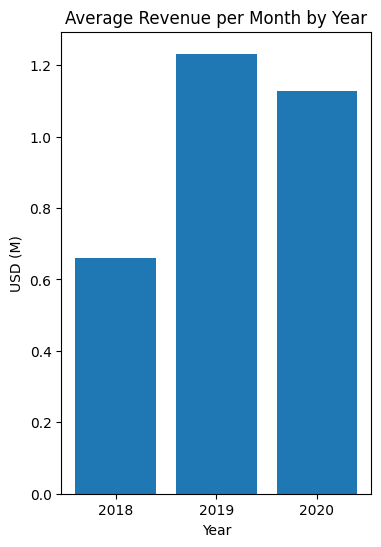

In [69]:
ax = plt.subplots(figsize=(4, 6))[1]
# plt.subplots() creates tuple with (figure object, axes object), so we assign 'ax' to be the axes object
# In another instance, we may instead have wanted to done assigment: fig, ax = plt.subplots(), therefore assigning fig = figure object and ax = axes object
ax.get_yaxis().get_offset_text().set_visible(False)
# suppress the '1e6' top left label
plt.bar(df_revenue_agg['arrival_date_year'], df_revenue_agg['avg_revenue_per_m_by_y'])
plt.xticks(df_revenue_agg['arrival_date_year'])
plt.xlabel("Year")
plt.title("Average Revenue per Month by Year")
plt.ylabel("USD (M)")
# plt.grid(visible = True, axis = "y")
plt.show()


We now see graphically that average revenue from completed bookings per month was comparable in 2019 and 2020, but dramatically less in 2018

Revenue Analysis Section 1 wrap-up:<br>
1) Avg revenue per month grew drastically 2018 - 19.<br>
2) Avg revenue per month then declined slightly YoY 2020

To investigate:
- Drivers of growth 2019 vs 2018.
- Did these same drivers maintain in 2020, or did different combinations come into play?
- Attempt to drive insights into whether 2019 and 2020 high relative performance are sustainable or volatile

## Revenue Analysis 2 - Drivers 2019 vs 2018

### Diagnose number of (completed) bookings vs value of (completed) bookings

In [70]:
df_2018_bookings = df_2018_vs_2019.groupby(["arrival_date_year", "arrival_date_month"]).size().reset_index(name="bookings")

# df_2018_bookings = df_2018_bookings.merge(df_revenue, on = ["arrival_date_year", "arrival_date_month"])[["arrival_date_year", "arrival_date_month", "revenue_per_ym", "bookings"]].drop_duplicates()
# df_2018_bookings["revenue_per_booking"] = df_2018_bookings.revenue_per_ym / df_2018_bookings.bookings
# df_2018_bookings = df_2018_bookings.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = ["bookings", "revenue_per_booking"])
# df_2018_bookings[("bookings", "num_bookings_delta")] = df_2018_bookings[("bookings", 2019)] - df_2018_bookings[("bookings", 2018)]
# df_2018_bookings[("revenue_per_booking", "booking_rev_delta")] = df_2018_bookings[("revenue_per_booking", 2019)] - df_2018_bookings[("revenue_per_booking", 2018)]
# df_2018_bookings = df_2018_bookings.sort_index(axis=1, level=0)

df_2018_bookings_pivot = df_2018_bookings.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "bookings")
df_2018_bookings_pivot.columns.name = "bookings"
df_2018_bookings_pivot["abs_delta"] = df_2018_bookings_pivot[2019] - df_2018_bookings_pivot[2018]
df_2018_bookings_pivot["pc_delta"] = (df_2018_bookings_pivot[2019] - df_2018_bookings_pivot[2018]) / df_2018_bookings_pivot[2018]
df_2018_bookings_pivot.loc["YTD", [2018, 2019, "abs_delta"]] = df_2018_bookings_pivot.sum()
df_2018_bookings_pivot.loc["YTD", ["pc_delta"]] = df_2018_bookings_pivot.mean()
df_2018_bookings_pivot

bookings,2018,2019,abs_delta,pc_delta
arrival_date_month,,,,
8,1837.00,4793.00,2956.00,1.61
9,2277.00,5057.00,2780.00,1.22
10,2234.00,5239.00,3005.00,1.35
11,1371.00,3842.00,2471.00,1.80
12,1543.00,3621.00,2078.00,1.35
YTD,9262.00,22552.00,13290.00,1.46


The revenue gain 2019 vs 2018 is driven strongly by more bookings

In [71]:
df_2018_bookings_rev = df_2018_vs_2019.groupby(["arrival_date_year", "arrival_date_month"])["booking_revenue"].sum().reset_index(name = "booking_revenue")

df_2018_bookings_rev = df_2018_bookings_rev.merge(df_2018_bookings, on = ["arrival_date_year", "arrival_date_month"])
# df_2018_bookings_rev # check columns ok

df_2018_bookings_rev["revenue_per_booking"] = df_2018_bookings_rev.booking_revenue / df_2018_bookings.bookings
df_2018_bookings_rev = df_2018_bookings_rev[["arrival_date_year", "arrival_date_month", "revenue_per_booking"]]

df_2018_bookings_rev_pivot = df_2018_bookings_rev.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "revenue_per_booking")
df_2018_bookings_rev_pivot.columns.name = "revenue_per_booking"

df_2018_bookings_rev_pivot["abs_delta"] = df_2018_bookings_rev_pivot[2019] - df_2018_bookings_rev_pivot[2018]
df_2018_bookings_rev_pivot["pc_delta"] = (df_2018_bookings_rev_pivot[2019] - df_2018_bookings_rev_pivot[2018]) / df_2018_bookings_rev_pivot[2018]
df_2018_bookings_rev_pivot.loc["YTD", [2018, 2019]] = df_2018_bookings_rev_pivot.sum()
df_2018_bookings_rev_pivot.loc["YTD", ["pc_delta", "abs_delta"]] = df_2018_bookings_rev_pivot.mean()

df_2018_bookings_rev_pivot

revenue_per_booking,2018,2019,abs_delta,pc_delta
arrival_date_month,,,,
8,565.65,562.60,-3.05,-0.01
9,397.79,401.03,3.24,0.01
10,285.71,306.46,20.74,0.07
11,225.30,259.54,34.24,0.15
12,254.94,282.20,27.26,0.11
YTD,1729.39,1811.82,16.49,0.07


The revenue gain 2019 vs 2018 is driven weakly by more valuable bookings

As the 2019 vs 2018 difference is more obviously driven by number of bookings, rather than value of bookings, prioritise looking into this aspect

### Investigate drivers of number of (completed / non-refunded) bookings

#### By Hotel Type

In [72]:
df_2018_bookings_hotel = df_2018_vs_2019.groupby(["hotel", "arrival_date_year", "arrival_date_month"]).size().reset_index(name = "bookings")
# df_bookings_hotel
df_2018_bookings_hotel_pivot = df_2018_bookings_hotel.pivot(index = "arrival_date_month", columns = ["hotel", "arrival_date_year"], values = "bookings")

df_2018_bookings_hotel_pivot[("City Hotel", "abs_delta")] = df_2018_bookings_hotel_pivot[("City Hotel", 2019)] - df_2018_bookings_hotel_pivot[("City Hotel", 2018)]
df_2018_bookings_hotel_pivot[("Resort Hotel", "abs_delta")] = df_2018_bookings_hotel_pivot[("Resort Hotel", 2019)] - df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]
df_2018_bookings_hotel_pivot[("City Hotel", "pc_delta")] = (df_2018_bookings_hotel_pivot[("City Hotel", 2019)] - df_2018_bookings_hotel_pivot[("City Hotel", 2018)]) / df_2018_bookings_hotel_pivot[("City Hotel", 2018)]
df_2018_bookings_hotel_pivot[("Resort Hotel", "pc_delta")] = (df_2018_bookings_hotel_pivot[("Resort Hotel", 2019)] - df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]) / df_2018_bookings_hotel_pivot[("Resort Hotel", 2018)]
df_2018_bookings_hotel_pivot = df_2018_bookings_hotel_pivot.sort_index(axis=1, level=0)

df_2018_bookings_hotel_pivot.loc["YTD", [("City Hotel", 2018), ("City Hotel", 2019), ("City Hotel", "abs_delta"), ("Resort Hotel", 2018), ("Resort Hotel", 2019), ("Resort Hotel", "abs_delta") ]] = df_2018_bookings_hotel_pivot.sum()
df_2018_bookings_hotel_pivot.loc["YTD", [("City Hotel", "pc_delta"), ("Resort Hotel", "pc_delta")]] = df_2018_bookings_hotel_pivot.mean()

df_2018_bookings_hotel_pivot

hotel              City Hotel                             Resort Hotel  \
arrival_date_year        2018     2019 abs_delta pc_delta         2018   
arrival_date_month                                                       
8                      852.00  2746.00   1894.00     2.22       985.00   
9                     1363.00  3186.00   1823.00     1.34       914.00   
10                    1263.00  3075.00   1812.00     1.43       971.00   
11                     639.00  2146.00   1507.00     2.36       732.00   
12                     766.00  1982.00   1216.00     1.59       777.00   
YTD                   4883.00 13135.00   8252.00     1.79      4379.00   

hotel                                          
arrival_date_year     2019 abs_delta pc_delta  
arrival_date_month                             
8                  2047.00   1062.00     1.08  
9                  1871.00    957.00     1.05  
10                 2164.00   1193.00     1.23  
11                 1696.00    964.00     1.32  
12                 1639.00    862.00     1.11  
YTD                9417.00   5038.00     1.16

Both hotel types contributed strongly to the increased number of bookings 2019 vs 2018.

#### By market segment

In [73]:
# df_main[["market_segment", "distribution_channel"]].
# unique can't apply to a dataframe (only a column (series) within)
# So:
df_main[["market_segment", "distribution_channel"]].drop_duplicates().sort_values(by = "market_segment").reset_index(drop = True)

,market_segment,distribution_channel
0,Aviation,Corporate
1,Aviation,TA/TO
2,Complementary,Corporate
3,Complementary,Direct
4,Complementary,TA/TO
5,Corporate,TA/TO
6,Corporate,Corporate
7,Corporate,Direct
8,Direct,Undefined
9,Direct,Corporate


In [74]:
# df_main_trunc = df_main[["arrival_date_year", "arrival_date_month", "market_segment", "distribution_channel", "booking_revenue", "meal_revenue", "room_revenue", "discount"]][(df_main.is_canceled == 0) & (df_main.arrival_date_month < 9) & df_main.arrival_date_year.between(2019, 2020)].reset_index(drop = True)
# df_main_trunc.head(10)

df_2018_segments = df_2018_vs_2019.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2018_segments_pivot = df_2018_segments.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2018_segments_pivot.fillna(0, inplace = True)
df_2018_segments_pivot.fillna(0, inplace = True)
df_2018_segments_pivot["abs_delta"] = df_2018_segments_pivot[2019] - df_2018_segments_pivot[2018]
df_2018_segments_pivot["pc_delta"] = (df_2018_segments_pivot[2019] - df_2018_segments_pivot[2018]) / df_2018_segments_pivot[2018]
df_2018_segments_pivot

arrival_date_year,2018,2019,abs_delta,pc_delta
market_segment,,,,
Aviation,0.00,45.00,45.00,inf
Complementary,9.00,29.00,20.00,2.22
Corporate,701.00,1403.00,702.00,1.00
Direct,1586.00,3449.00,1863.00,1.17
Groups,949.00,1794.00,845.00,0.89
Offline TA/TO,2325.00,4692.00,2367.00,1.02
Online TA,3692.00,11140.00,7448.00,2.02


Market segments across the board contributed to the increased number of bookings 2018 vs 2019.<br>
Considering scale and % delta, "**Online TA**" was the most critical driver, followed by "Offline TA/TO" and "Direct".<br>
That said, high % delta increase was realised by segments across the board

## Revenue Analysis 3 - Drivers 2020 vs (2019 vs 2018)

I.e. we know the drivers of stronger performance in 2019 over 2018 were:
1) More bookings through both hotel types, arguably more so with City Hotels
2) More bookings through all market segments, particular attention due for "**Online TA**", "Offline TA/TO" and "Direct"

Meanwhile, these were not particular strong drivers:
1) Value per bookings

So: given that 2020 YTD revenue performance has almost matched 2019,<br>
want to investigate behaviours going into 2020.<br>
E.g. market segments: did those key market segments continue to grow? Are there things to note about lead time, rate of cancellation, etc.?
E.g. hotels: has the same ratio of city:hotel maintained?

But first: see month by month shape of 2020 vs 2019 - look for flags e.g. was 'matching' YoY performance driven by extreme highs at first, then dampened, and therefore we should not expect EoY matching performance?

### Revenue Shape

In [75]:
df_2020_shape = df_2019_vs_2020.groupby(["arrival_date_year", "arrival_date_month"], as_index = False)["booking_revenue"].sum()
df_2020_shape_pivot = df_2020_shape.pivot(index = "arrival_date_month", columns = "arrival_date_year", values = "booking_revenue")
df_2020_shape_pivot.columns.name = "booking_revenue"
df_2020_shape_pivot

booking_revenue,2019,2020
arrival_date_month,,
1,286501.94,530149.37
2,508170.22,665134.47
3,779959.41,820797.42
4,843303.89,1102884.95
5,930561.40,1204886.41
6,1010112.58,1309482.19
7,2073266.59,1640387.00
8,2696557.55,1746845.94


Revenue shows no signs of stopping 2020 YTD, in fact it is monotonically rising

### Market Segment Behaviour

#### Number of Bookings

In [76]:
df_2020_segments = df_2019_vs_2020.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2020_segments_pivot = df_2020_segments.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2020_segments_pivot.fillna(0, inplace = True)
df_2020_segments_pivot["abs_delta"] = df_2020_segments_pivot[2020] - df_2020_segments_pivot[2019]
df_2020_segments_pivot["pc_delta"] = (df_2020_segments_pivot[2020] - df_2020_segments_pivot[2019]) / df_2020_segments_pivot[2019]
df_2020_segments_pivot

arrival_date_year,2019,2020,abs_delta,pc_delta
market_segment,,,,
Aviation,50,83,33,0.66
Complementary,18,11,-7,-0.39
Corporate,1291,1066,-225,-0.17
Direct,3755,3616,-139,-0.04
Groups,1096,1299,203,0.19
Offline TA/TO,4884,3102,-1782,-0.36
Online TA,12362,12341,-21,-0.00


In [77]:
df_2020_segments_prop = df_2019_vs_2020.groupby(["market_segment", "arrival_date_year"]).size().reset_index(name = "bookings").sort_values(by = ["arrival_date_year", "market_segment"])
df_2020_segments_prop_pivot = df_2020_segments_prop.pivot(index = "market_segment", columns = "arrival_date_year", values = "bookings")
df_2020_segments_prop_pivot["2019_total"] = df_2020_segments_prop_pivot[2019].sum()
df_2020_segments_prop_pivot["2019_pc"] = df_2020_segments_prop_pivot[2019] / df_2020_segments_prop_pivot["2019_total"]
df_2020_segments_prop_pivot["2020_total"] = df_2020_segments_prop_pivot[2020].sum()
df_2020_segments_prop_pivot["2020_pc"] = df_2020_segments_prop_pivot[2019] / df_2020_segments_prop_pivot["2020_total"]
df_2020_segments_prop_pivot = df_2020_segments_prop_pivot[[2019, "2019_total", "2019_pc", 2020, "2020_total", "2020_pc"]]
df_2020_segments_prop_pivot.columns = pd.MultiIndex.from_tuples([("2019", "Count"), ("2019", "Total"), ("2019", "pc"), ("2020", "Count"), ("2020", "Total"), ("2020", "pc")])
df_2020_segments_prop_pivot

2019               2020            
                Count  Total   pc  Count  Total   pc
market_segment                                      
Aviation           50  23456 0.00     83  21518 0.00
Complementary      18  23456 0.00     11  21518 0.00
Corporate        1291  23456 0.06   1066  21518 0.06
Direct           3755  23456 0.16   3616  21518 0.17
Groups           1096  23456 0.05   1299  21518 0.05
Offline TA/TO    4884  23456 0.21   3102  21518 0.23
Online TA       12362  23456 0.53  12341  21518 0.57

- For 2020 YTD vs 2019, the proportion of total number of bookings accountable to each market segment was very comparable
- Especially encouraging to see key segment "Online TA" hold strong, as well as "Direct" (slight losses in 2020 YTD but close to matching 2019 YTD)
- However, in df_2020_segments_pivot we see that secondary key segment "Offline TA/TO" decreased 36% in 2020 YTD versus 2019 YTD
    - This worsened performance of this segment was a large contributor to the overall shortfall in bookings in 2020 YTD.<br>
    Calculated elsewhere: it is worth 92% of the overall decline in number of bookings
    - As Offline TA/TO commands approx 23% of leads, is worth bolstering support for this


#### Cancellations

First see overall proportion of bookings per year (to-date) cancelled, regardless of refundability

In [113]:
# df_main_complete := actually completed or cancelled + non-refundable
# df_main := agnostic to refundability

# Filter down df_main to appropriate dates and useful cols:

df_2019_vs_2020_canc = df_main[["arrival_date_year", "market_segment", "is_canceled", "deposit_type"]][(df_main.arrival_date_month < 9) & df_main.arrival_date_year.between(2019, 2020)].reset_index(drop = True)

In [130]:
# Calculate % of bookings per year (to-date) cancelled, regardless of refundability

df_2020_segments_canc = df_2019_vs_2020_canc.groupby(["arrival_date_year", "market_segment"])["is_canceled"].sum().reset_index().rename(columns = {"is_canceled" : "num_cancelled"})
df_2020_segments_canc

df_2020_segments_comp = df_2019_vs_2020_canc[df_2019_vs_2020_canc.is_canceled == 0].groupby(["arrival_date_year", "market_segment"]).size().reset_index().rename(columns = {0 : "num_complete"})
df_2020_segments_comp

df_2020_segments_comp = df_2020_segments_comp.merge(df_2020_segments_canc, on = ["arrival_date_year", "market_segment"])
df_2020_segments_comp["booked"] = df_2020_segments_comp["num_complete"] + df_2020_segments_comp["num_cancelled"]
df_2020_segments_comp["pc_cancelled"] =  df_2020_segments_comp["num_cancelled"] / df_2020_segments_comp["booked"]
df_2020_segments_comp = df_2020_segments_comp[["arrival_date_year", "market_segment", "num_cancelled", "pc_cancelled"]]
df_2020_segments_comp_pivot = df_2020_segments_comp.pivot(index = "market_segment", columns = "arrival_date_year", values = ["num_cancelled", "pc_cancelled"])
# df_2020_segments_comp_pivot.columns.name = "cancellation analysis"
df_2020_segments_comp_pivot[("pc_cancelled", "delta p.p.")] = df_2020_segments_comp_pivot[("pc_cancelled", 2020)] - df_2020_segments_comp_pivot[("pc_cancelled", 2019)]
df_2020_segments_comp_pivot[("num_cancelled", "delta")] = df_2020_segments_comp_pivot[("num_cancelled", 2020)] - df_2020_segments_comp_pivot[("num_cancelled", 2019)]
df_2020_segments_comp_pivot[("num_cancelled", "pc_delta")] = df_2020_segments_comp_pivot[("num_cancelled", "delta")] / df_2020_segments_comp_pivot[("num_cancelled", 2019)]

df_2020_segments_comp_pivot = df_2020_segments_comp_pivot.sort_index(axis=1, level=0)
df_2020_segments_comp_pivot

num_cancelled                          pc_cancelled       \
arrival_date_year          2019    2020   delta pc_delta         2019 2020   
market_segment                                                               
Aviation                  13.00   21.00    8.00     0.62         0.21 0.20   
Complementary             25.00   28.00    3.00     0.12         0.58 0.72   
Corporate                164.00  171.00    7.00     0.04         0.11 0.14   
Direct                   621.00  657.00   36.00     0.06         0.14 0.15   
Groups                   446.00  439.00   -7.00    -0.02         0.33 0.29   
Offline TA/TO            800.00  639.00 -161.00    -0.20         0.14 0.18   
Online TA               6167.00 8151.00 1984.00     0.32         0.33 0.40   

                              
arrival_date_year delta p.p.  
market_segment                
Aviation               -0.00  
Complementary           0.14  
Corporate               0.03  
Direct                  0.01  
Groups                 -0.05  
Offline TA/TO           0.03  
Online TA               0.06

Overall there are more cancelled bookings in 2020 YTD, and this is especially driven by Online TA segment.<br>
Calculated elsewhere, 1984/1870 = 106% of the increase in cancellations in 2020 was due to this segment.<br>
The scale of numbers implies this might naturally be a segment with greater propensity to cancel (ease of online facilities?),<br>
but still, the proportion of cancellations went up 6 p.p. Even if this segment naturally cancels more, should still exercise controls over the proportion doing so.

Next, analyse with nuance: some cancellations still generate revenue.<br>
... Assess 'quality' of completed bookings, i.e. if generates revenue, it is a quality booking

In [ ]:
# What % of bookings per year (to-date) were 'completed' i.e. generated revenue, i.e. actually completed, or non-refundable?
# Reminder: df_2019_vs_2020 is already filtered on date (YTD) and either actually completed, or cancelled but non-refundable

df_2020_segments_valuable = df_2019_vs_2020.groupby(["arrival_date_year", "market_segment"]).size().reset_index().rename(columns = {0 : "num_generating_revenue"})

df_2020_segments_non_valuable = df_main_cancelled.groupby(["arrival_date_year", "market_segment"]).size().reset_index().rename(columns = {0 : "num_not_generating_revenue"})

df_2020_segments_valuable = df_2020_segments_non_valuable.merge(df_2020_segments_valuable, on = ["arrival_date_year", "market_segment"])

df_2020_segments_valuable["booked"] = df_2020_segments_valuable["num_generating_revenue"] + df_2020_segments_valuable["num_not_generating_revenue"]
df_2020_segments_valuable["pc_generating_revenue"] = df_2020_segments_valuable["num_generating_revenue"] / df_2020_segments_valuable["booked"]

df_2020_segments_valuable = df_2020_segments_valuable[["arrival_date_year", "market_segment", "pc_generating_revenue"]]
df_2020_segments_valuable
df_2020_segments_valuable_pivot = df_2020_segments_valuable.pivot(index = "market_segment", columns = "arrival_date_year", values = "pc_generating_revenue")
df_2020_segments_valuable_pivot.columns.name = "% generating revenue"
df_2020_segments_valuable_pivot["delta p.p."] = df_2020_segments_valuable_pivot[2020] - df_2020_segments_valuable_pivot[2019]
df_2020_segments_valuable_pivot

% generating revenue,2019,2020,delta p.p.
market_segment,,,
Aviation,0.68,0.80,0.12
Complementary,0.24,0.28,0.04
Corporate,0.81,0.87,0.06
Direct,0.78,0.85,0.07
Groups,0.69,0.86,0.16
Offline TA/TO,0.80,0.85,0.05
Online TA,0.55,0.60,0.05


The % of bookings which generated revenue increased across all segment types, which is encouraging.<br>
Though Online TA had many cancellations, at least those that went through were of higher quality, arguably(*).<br>
(*): Bookings that generated revenue through capture of non-refundable deposit are arguably non-sutainable / based on luck. But not necessarily - depends. Whatever the case, analyse next:

In [129]:
# What proportion of revenue-generating bookings per segment were categorised as such due to being non-refundable cancellations as opposed to actual completions?
# Reminder: df_2019_vs_2020 is already filtered on date (YTD) and either actually completed, or cancelled but non-refundable
# I.e. analysis is strictly for revenue-generating bookings, not bookings in YTD overall
df_2020_segments_cancel = df_2019_vs_2020.groupby(["arrival_date_year", "market_segment"])["is_canceled"].sum().reset_index().rename(columns = {"is_canceled" : "num_cancelled"})
# How many of the overall revenue-generating bookings per category (year, segment) were cancelled (generated revenue through capture of non-refundable deposit)?
df_2020_segments_size = df_2019_vs_2020.groupby(["arrival_date_year", "market_segment"]).size().reset_index().rename(columns = {0 : "size"})
# size := number of bookings per category (year, segment) that generated revenue
df_2020_segments_size = df_2020_segments_cancel.merge(df_2020_segments_size, on = ["arrival_date_year", "market_segment"])

df_2020_segments_size["pc_cancelled"] = df_2020_segments_size["num_cancelled"] / df_2020_segments_size["size"]

df_2020_segments_size = df_2020_segments_size[["arrival_date_year", "market_segment", "pc_cancelled"]]
df_2020_segments_size_pivot = df_2020_segments_size.pivot(index = "market_segment", columns = "arrival_date_year", values = "pc_cancelled")
df_2020_segments_size_pivot.columns.name = "pc cancelled"
df_2020_segments_size_pivot["delta p.p."] = df_2020_segments_size_pivot[2020] - df_2020_segments_size_pivot[2019]
df_2020_segments_size_pivot

pc cancelled,2019,2020,delta p.p.
market_segment,,,
Aviation,0.00,0.00,0.00
Complementary,0.00,0.00,0.00
Corporate,0.00,0.01,0.01
Direct,0.00,0.00,0.00
Groups,0.19,0.17,-0.02
Offline TA/TO,0.02,0.03,0.01
Online TA,0.00,0.00,0.00


The increase in proportion of bookings which are revenue-generating in 2020 YTD as compared to 2019 YTD is not supported by a proportional increase in capture of non-refundable cancellations. This is healthy, as dependency on such a mechanism is based on luck / is non-predicatable.<br>
That said, the "Groups" segment has respectively 19% then 17% of revenue-generating bookings being this type of cancelled, non-refundable one. Aim to minimise.

#### Lead Time

Lead time := time between making of reservation and actual check-in date.<br>
Min = 0, Max = 709 ... assume means days

In [81]:
# df_2019_vs_2020[df_2019_vs_2020.lead_time > 0].lead_time.min()
df_2019_vs_2020[df_2019_vs_2020.lead_time > 0].lead_time.max()

np.int64(709)

In [82]:
# pd.options.display.max_rows = 450
df_2019_vs_2020_all.groupby("lead_time", as_index = False).size()
# Take this to mean no outliers, so lead_time.mean() is valid

,lead_time,size
0,0,3855
1,1,2220
2,2,1329
3,3,1135
4,4,1083
...,...,...
435,608,2
436,615,2
437,622,2
438,629,2


In [54]:
# pd.options.display.max_rows = 50

In [83]:
df_2020_segments_lead = df_2019_vs_2020_all.groupby(["arrival_date_year", "is_canceled", "market_segment"])["lead_time"].mean().reset_index().rename(columns = {"lead_time" : "mean_lead_time"})

df_2020_segments_lead_pivot = df_2020_segments_lead.pivot(index= ["market_segment", "is_canceled"], columns = "arrival_date_year", values = "mean_lead_time")

df_2020_segments_lead_pivot["delta"] = df_2020_segments_lead_pivot[2020] - df_2020_segments_lead_pivot[2019]
df_2020_segments_lead_pivot["pc_delta"] = df_2020_segments_lead_pivot["delta"] / df_2020_segments_lead_pivot[2019]

df_2020_segments_lead_pivot.columns.name = "mean_lead_time"
df_2020_segments_lead_pivot

mean_lead_time               2019   2020  delta  pc_delta
market_segment is_canceled                               
Aviation       0             4.82   3.64  -1.18     -0.25
               1             7.92   2.33  -5.59     -0.71
Complementary  0            22.28  17.27  -5.01     -0.22
               1            16.52  12.36  -4.16     -0.25
Corporate      0            12.32  14.87   2.55      0.21
               1            16.98  32.89  15.92      0.94
Direct         0            43.17  56.63  13.46      0.31
               1            62.22  86.36  24.14      0.39
Groups         0           118.95 127.79   8.84      0.07
               1           178.95 179.22   0.27      0.00
Offline TA/TO  0            97.31 120.69  23.38      0.24
               1           117.62 157.90  40.28      0.34
Online TA      0            61.87  81.29  19.42      0.31
               1            84.18 120.84  36.66      0.44
Undefined      1             1.50    NaN    NaN       NaN

For those same important market segments, mean lead time has increased whether for cancellations or completed bookings.<br>
Longer lead time for completed bookings --> customers are more confident in their purchasing decision, so this bodes well - they are booking in advance.<br>

However, there is also a rising trend of customers that have booked far in advance (long lead time) and cancelled too.<br>
Indeed, not only has "Online TA" increased in actual number of cancellations and decreased in % completed, but we can now see that their cancelled bookings have longer lead-times on average<br>
This overall implies volatility in this market segment.<br>
Perhaps consider early booking incentives for non-refundable rates